In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
lonely = pd.read_csv("msoa_loneliness.csv")
tundramsoa = pd.read_csv("msoa_1216.csv")
tundralsoa = pd.read_csv("lsoa_1216.csv")
lonely = lonely.drop(['objectid','msoa11nm','msoa11nmw','st_areasha','st_lengths','geometry','loneills_2018_class','Unnamed: 0'],axis = 1)
lonely = lonely.rename(columns={"msoa11cd": "msoa11"})
#print(lonely.head())
#print(tundramsoa.head())
tundra = pd.merge(lonely,tundramsoa,on='msoa11')
#print(tundra.head())

0.027422059672751634
-0.1993803627256832
0.020996474729016716


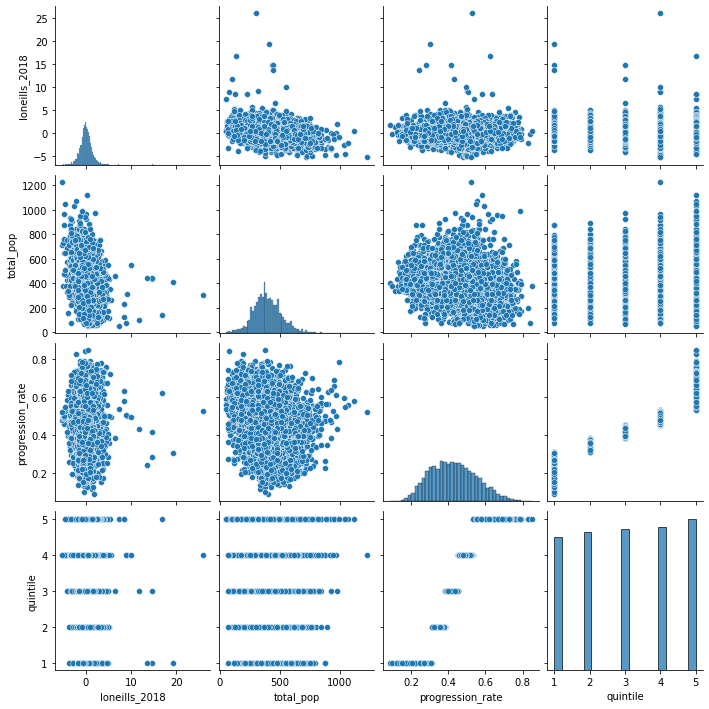

In [4]:
sns.pairplot(tundra)
print(tundra['loneills_2018'].corr(tundra['progression_rate'],method='spearman'))
print(tundra['loneills_2018'].corr(tundra['total_pop'],method='spearman'))
print(tundra['loneills_2018'].corr(tundra['quintile'],method='spearman'))

In [10]:
msoa_la_code_df = pd.read_csv('PCD_OA_LSOA_MSOA_LAD_FEB22_UK_LU.csv', encoding='latin-1') #change encoding to fix read error
#get LA code from msoa code
msoa_code_rows = msoa_la_code_df.loc[msoa_la_code_df['msoa11cd'].isin(tundra['msoa11'])]
msoa_code_conv = dict(zip(msoa_code_rows['msoa11cd'],msoa_code_rows['ladcd']))
tundra['LA code'] = tundra['msoa11'].apply(lambda x: msoa_code_conv[x])
print(tundra.head())
counts = tundra.groupby('LA code').count()
LA_progression_sum = tundra.groupby('LA code').sum()['progression_rate']
LA_total_pop_sum = tundra.groupby('LA code').sum()['total_pop']
LA_index_average = LA_progression_sum / counts['msoa11']

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_16488/3330530835.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  msoa_la_code_df = pd.read_csv('PCD_OA_LSOA_MSOA_LAD_FEB22_UK_LU.csv', encoding='latin-1') #change encoding to fix read error


      msoa11  loneills_2018  total_pop  progression_rate  quintile    LA code
0  E02000001       0.610642       80.0             0.650       5.0  E09000001
1  E02000002      -0.155306      435.0             0.380       2.0  E09000002
2  E02000003       0.326728      600.0             0.503       4.0  E09000002
3  E02000004       0.324374      405.0             0.375       2.0  E09000002
4  E02000005       0.334801      600.0             0.403       3.0  E09000002


In [17]:
main_df = LA_index_average.rename('progression_rate').to_frame()
main_df = main_df.merge(LA_total_pop_sum,left_on='LA code',right_on= 'LA code')
main_df.to_csv('outputDataframe.csv')
main_df.head()

,progression_rate,total_pop
LA code,,
E06000001,0.389333,5480.0
E06000002,0.413947,7890.0
E06000003,0.374421,7550.0
E06000004,0.427333,10385.0
E06000005,0.390533,5635.0
